In [ ]:
%pip install pandas
%pip install matplotlib

In [2]:
from os import listdir
from typing import TypedDict, Literal
from pandas import read_csv, DataFrame
from matplotlib import pyplot

Defines what `data` looks like, it will be a dictionary of dictionaries.

In [3]:
'''
{
	'close_car': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'close_noCar': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'far_car': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'far_noCar': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
}
'''

Settings = Literal['close_car'] | Literal['close_noCar'] | Literal['far_car'] | Literal['far_noCar']
Params = Literal['Bandwidth'] | Literal['Frequency'] | Literal['SpreadingFactor'] | Literal['TxPower']

class Params(TypedDict):
	Params: DataFrame

class Data(TypedDict):
	Settings: Params

Data collection and cleaning.

In [59]:
data: Data = {}
names = ['Time','Number','S_Lat','S_Long','Bandwidth','CodingRate','Frequency','SpreadingFactor','TxPower','PacketRSSI','RSSI','SNR','R_Lat','R_Long']
for csv in listdir():
	if csv.endswith('csv'):
		skiprows = []
		with open(csv) as f:
			i = 0
			for line in f.readlines():
				if len(line.split(',')) != len(names):
					skiprows.append(i)
				i += 1
		# skip any row that does not have the right number of columns
		df = read_csv(csv, header=None, names=names, skiprows=skiprows)
		df.loc[df['R_Lat'] == 0, 'R_Lat'] = -31.977475
		df.loc[df['R_Long'] == 0, 'R_Long'] = 115.816290
		# store it in the dictionary
		settings = csv.split('_')
		setting = '_'.join(settings[:2])
		param = settings[2].split('.')[0]
		if setting in data:
			data[setting][param] = df
		else:
			data[setting] = {param: df}

In [60]:
def plot(ylabel: str):
	'''
	for each setting where the experiment was conducted plot one of the link quality metrics against different Lora parameters for all the data point collected.
	'''
	for setting, params in data.items():
		i = 1
		figure = pyplot.figure(figsize=(20,5))
		figure.suptitle(setting)
		for param, item in sorted(params.items()):
			pyplot.subplot(1, 4, i)
			powers = []
			for tx, df in item.groupby(param)[ylabel]:
				if (i == 1):
					pyplot.ylabel(ylabel)
				df.plot(xlabel='Number', title=param)
				powers.append(tx)
			pyplot.gca().legend(powers)
			i += 1

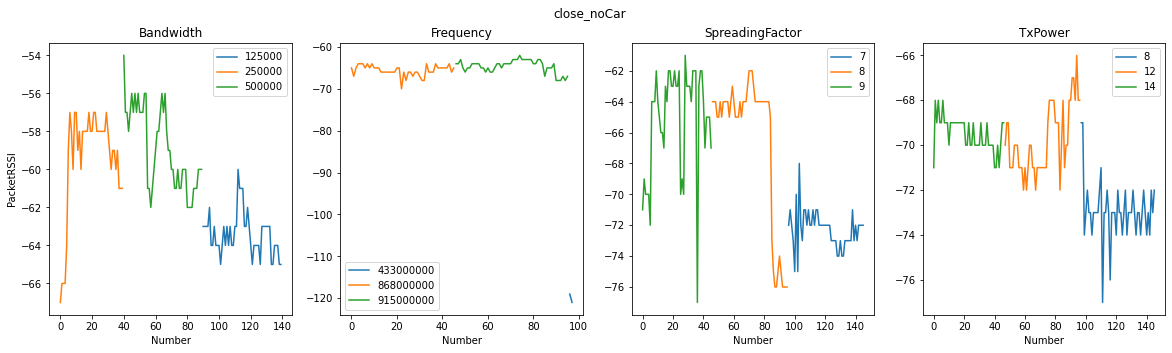

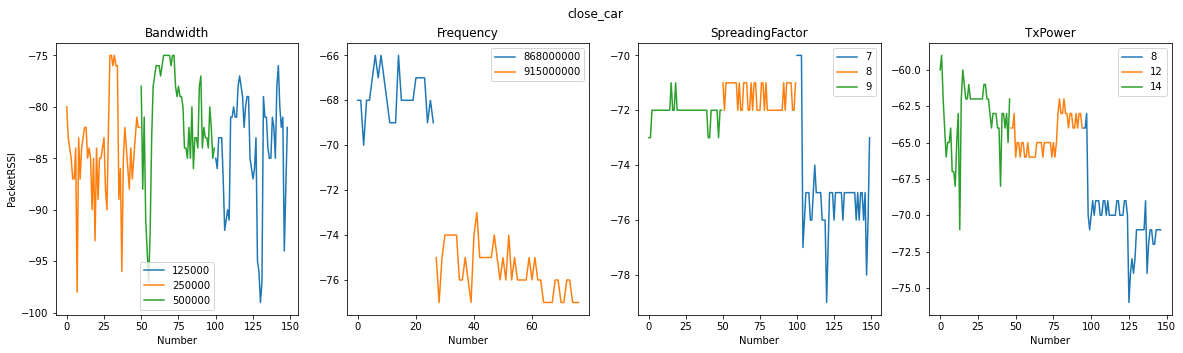

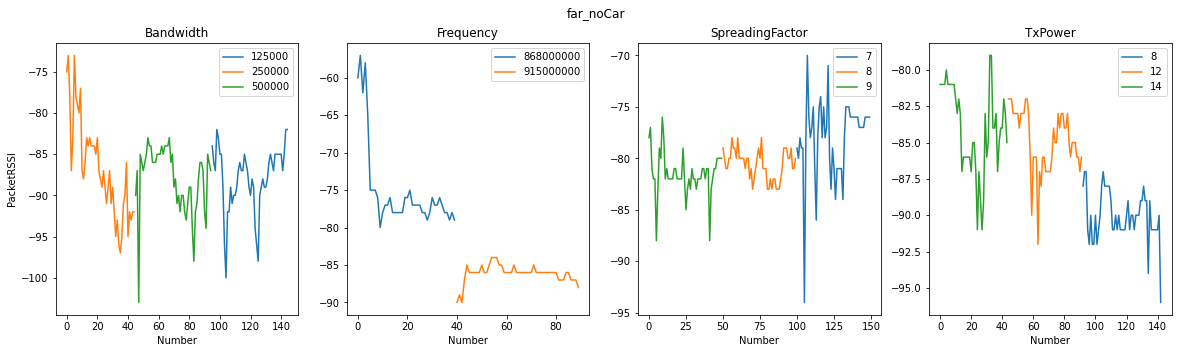

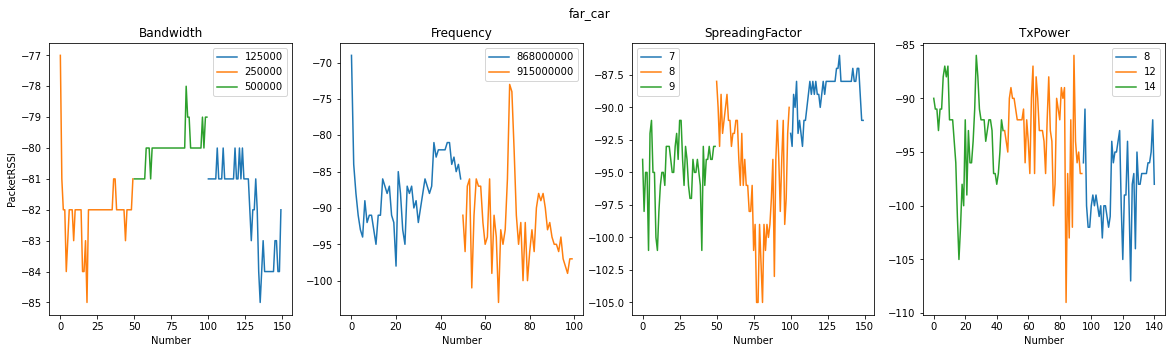

In [61]:
plot('PacketRSSI')

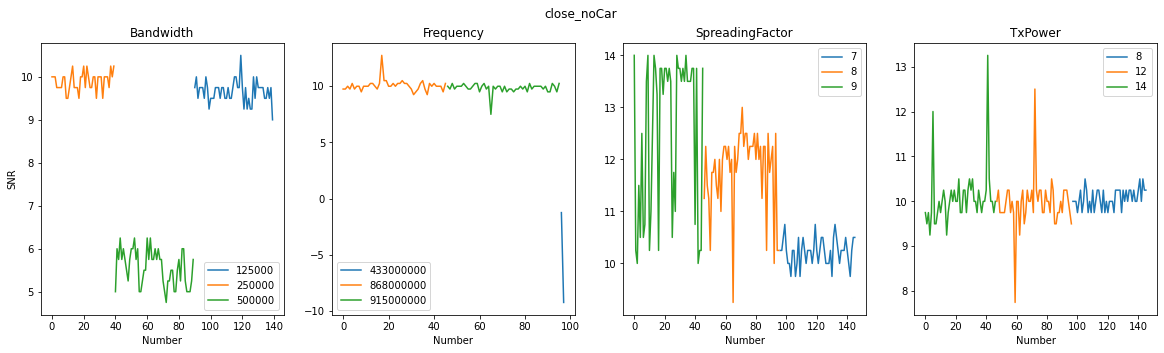

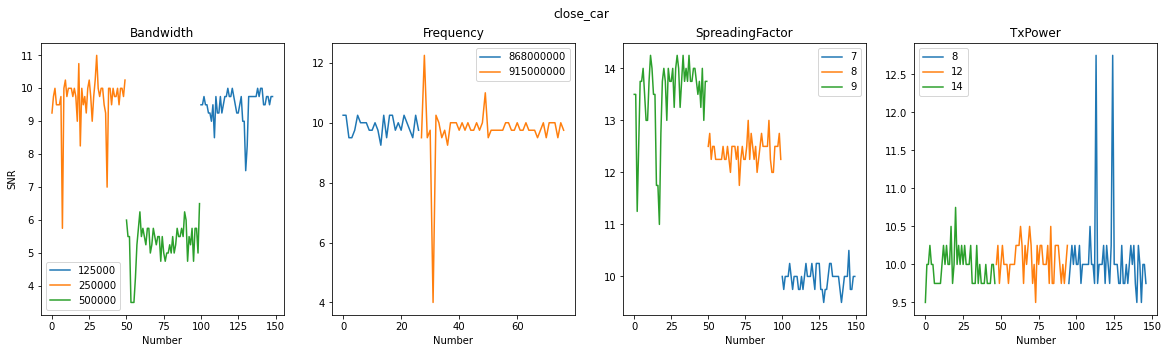

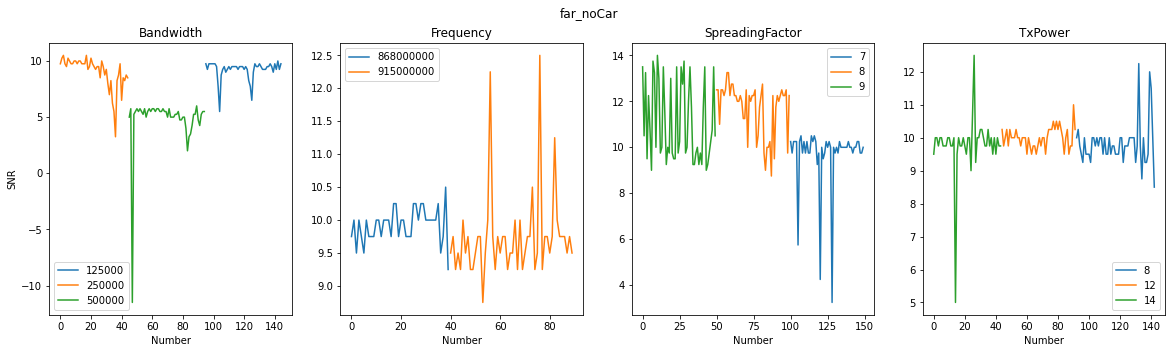

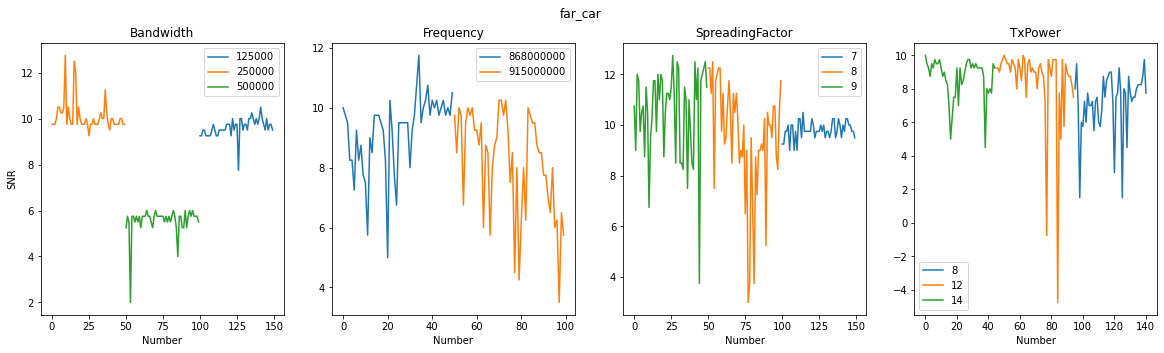

In [62]:
plot('SNR')